In [203]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *# MSE,MSA등 다 들어있음.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
#앙상블
from sklearn.ensemble import VotingClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
# from lightgbm import  LGBMClassifier 코렙에는 깔려있음 주피터는 깔아야함.

In [135]:
house = datasets.load_boston()
house#딕셔너리 형태로 제공.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [136]:
house.keys()#딕셔너리는 keys함수 사용해서 안에 무엇이 들어있는지 확인.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [137]:
#data와 feature_names keys를 이용해 df를 만들어보자.
data = pd.DataFrame(house['data'], columns=house['feature_names'])
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [138]:
target = pd.DataFrame(house['target'], columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [139]:
data.shape, target.shape

((506, 13), (506, 1))

In [140]:
#concat함수를 사용해서 두 df를 붙여보자.
df = pd.concat([data, target], axis = 1)#axis=1열기준으로 붙이기
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [142]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [143]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [144]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],
    df['target'],
    test_size= 0.2,
    random_state = 42
   
)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [147]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
#test데이터로 예측값을 구해보자=========================

In [149]:
y_predict = lr.predict(X_test)
y_predict[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [150]:
#검증을 해보자.
#회귀의 정확도를 나타내는 평가지표는 MAE, MSE, RMSE, R2-score가  있다.
# 분류의 accuracy와 유사한 것은 R2-score이다.
r2_score(y_test, y_predict)#(실제값,예측값)

0.6687594935356294

In [151]:
#test데이터의 예측(MSE)
mse = mean_squared_error(y_test, y_predict)#MSE
mse

24.29111947497371

In [152]:
#train데이터로 해보자.=================================

In [153]:
y_predict2 = lr.predict(X_train)
y_predict2[:3]

array([10.96952405, 19.41196567, 23.06419602])

In [154]:
r2_score(y_train, y_predict2)

0.7508856358979673

In [155]:
#train데이터의 예측(MSE)
mse2 = mean_squared_error(y_train, y_predict2)#MSE
mse2

21.641412753226312

In [156]:
rmse1 = np.sqrt(mse)#test데이터
rmse2 = np.sqrt(mse2)#train데이터
print('trian오차 >>', rmse2, 'test오차 >> ', rmse1)

trian오차 >> 4.6520331848801675 test오차 >>  4.928602182665355


In [157]:
#tradeoff 관계 => 반대적인 관계를 부르는 말.
#r2_score, mse,rmse는 tadeoff관계

In [158]:
lr.coef_#기울기

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [159]:
lr.intercept_#절편

30.24675099392408

In [160]:
##상관관계를 고려하여 몇 개의 컬럼을 선정 후,
#전체컬럼을 넣었을 때와 비교해보자!

In [161]:
#상관도를 그려보자.

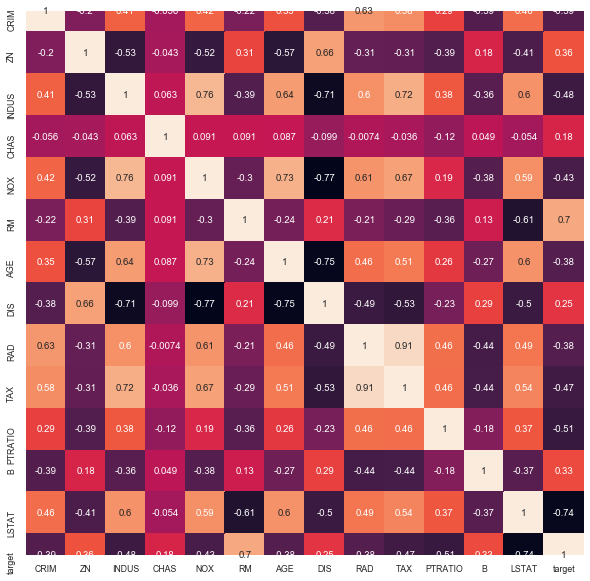

In [162]:
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False);
plt.show()

In [163]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [190]:
#컬럼값을 줄여서 train,test해보자.

In [191]:
df2 = df.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'target']]
df2.head(3)

,LSTAT,RM,PTRATIO,INDUS,target
0,4.98,6.575,15.3,2.31,24.0
1,9.14,6.421,17.8,7.07,21.6
2,4.03,7.185,17.8,7.07,34.7


In [192]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS']],
    df2['target'],
    test_size = 0.2,
    random_state = 42
)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((404, 4), (102, 4), (404,), (102,))

In [193]:
lr.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
test_predict = lr.predict(X_test2)
test_predict[:3]

array([26.60441858, 30.67642176, 16.76611204])

In [195]:
r2_test_part = r2_score(y_test2, test_predict)
r2_test_part

0.6284206754078387

In [222]:
## 회귀의 정확도를 나타내는 평가지표는 MAE, MSE(*), RMSE, R2-score
## 분류의 accuracy와 유사한 것은 R2_score
r2_test_total = r2_score(y_test, y_predict) ## test데이터
r2_test_total

0.3063547661127278

In [223]:
mse_test = mean_squared_error(y_test2, test_predict) 
mse_test

27.24931761650081

In [224]:
train_predict = lr.predict(X_train2)
train_predict[:3]

array([ 9.09954739, 20.30111549, 25.19531685])

In [225]:
r2_train_part = r2_score(y_train2, train_predict)
r2_train_part

0.6866881152922459

In [226]:
r2_train_total = r2_score(y_train, y_predict2) ## train데이터
r2_train_total

0.25690925988614244

In [227]:
mse_train = mean_squared_error(y_train2, train_predict) ## train데이터의 MSE
mse_train

27.21846988588176

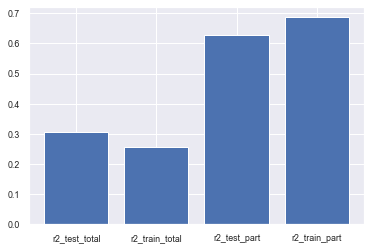

In [228]:
x = np.arange(4)
plt.bar(x, height= [
                    r2_test_total,
                    r2_train_total,
                    r2_test_part,
                    r2_train_part
            ])
plt.xticks(x, ['r2_test_total','r2_train_total', 
               'r2_test_part', 'r2_train_part']);

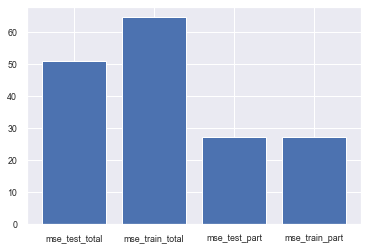

In [201]:
x = np.arange(4)
plt.bar(x, height= [
                    mse,
                    mse2,
                    mse_test,
                    mse_train
            ])
plt.xticks(x, ['mse_test_total','mse_train_total', 
               'mse_test_part', 'mse_train_part']);

In [ ]:
#라쏘,엘라스틱.릿지 사용 후
# train과 test데이터 accuracy차이가 줄어든것을 확인 할 수 있다.
#오버피팅 된 경우 라쏘,엘라스틱.릿지를 이용하여 오차를 줄일 수 있다.

In [204]:
# 선형회귀에 규제를 가한 것.
en = ElasticNet() #L1+L2
lasso = Lasso() #L1
ridge = Ridge() #L2

In [205]:
en.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [206]:
en_predict = en.predict(X_test)
lasso_predict = lasso.predict(X_test)
ridge_predict = ridge.predict(X_test)

In [207]:
r2_en = r2_score(y_test, en_predict)
r2_lasso = r2_score(y_test, lasso_predict)
r2_ridge = r2_score(y_test, ridge_predict)

In [208]:
mse_en = mean_squared_error(y_test, en_predict)
mse_lasso = mean_squared_error(y_test, lasso_predict)
mse_ridge = mean_squared_error(y_test, ridge_predict)

In [209]:
en_predict2 = en.predict(X_train)
lasso_predict2 = lasso.predict(X_train)
ridge_predict2 = ridge.predict(X_train)

In [210]:
r2_en2 = r2_score(y_train, en_predict2)
r2_lasso2 = r2_score(y_train, lasso_predict2)
r2_ridge2 = r2_score(y_train, ridge_predict2)

In [211]:
mse_en2 = mean_squared_error(y_train, en_predict2)
mse_lasso2 = mean_squared_error(y_train, lasso_predict2)
mse_ridge2 = mean_squared_error(y_train, ridge_predict2)

In [212]:
r2_en, r2_lasso, r2_ridge #test

(0.308772587195589, 0.30848203459395573, 0.3072765561002718)

In [213]:
r2_en2, r2_lasso2, r2_ridge2 #train

(0.25617835266383426, 0.2559018322274498, 0.2568382827566802)

In [214]:
mse_en, mse_lasso, mse_ridge #test(elastic, lasso규제후, test데이터가 개선됨.)

(50.69032120506972, 50.71162852655456, 50.80003082501481)

In [215]:
mse_en2, mse_lasso2, mse_ridge2 #train

(64.61831834873045, 64.64234062026856, 64.56098797527314)